In [1]:
import scanpy as sc
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=True)
vector(False)

# Sup9 A

In [3]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [4]:
df=adata[:,['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE']].to_df()
df[['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE']] = df[['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE']].applymap(lambda x: 'no' if x == 0 else 'yes')
ighg_columns = ['IGHG1', 'IGHG2', 'IGHG3', 'IGHG4']
igha_columns = ['IGHA1', 'IGHA2']

# 新增 IGHG 列
df['IGHG'] = df[ighg_columns].apply(lambda row: 'yes' if any(row == 'yes') else 'no', axis=1)

# 新增 IGHA 列
df['IGHA'] = df[igha_columns].apply(lambda row: 'yes' if any(row == 'yes') else 'no', axis=1)
df=df[['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE']]
columns_to_check = ['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE']

# 计算每个细胞的 yes 数量
df['yes_count'] = df[columns_to_check].apply(lambda row: row[row == 'yes'].count(), axis=1)

# 根据 yes 数量判断 CSR
df['CSR'] = df['yes_count'].apply(lambda x: 'NA' if x == 0 else 'no' if x == 1 else 'yes')

# 对于 CSR 为 yes 的细胞，记录出现的类型
df['class'] = df.apply(lambda row: ', '.join(row[columns_to_check][row[columns_to_check] == 'yes'].index) if row['CSR'] == 'yes' else '', axis=1)

# 删除临时列 yes_count
df.drop(columns=['yes_count'], inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


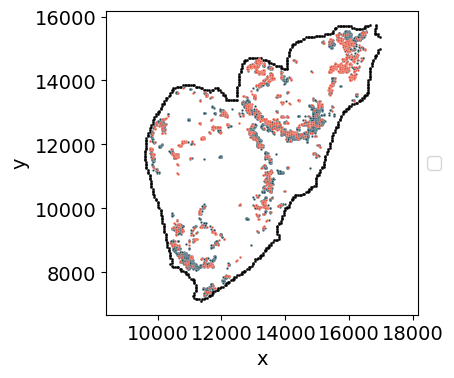

In [10]:
df=adata.obs
df=df[df['batch']=='D06050D4']
tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
sns.scatterplot(data=df[(df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))&(df['class'].isin(['IGHG, IGHA']))],x='x',y='y',color='#204B5A',s=3)
sns.scatterplot(data=df[(df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))&(df['class'].isin(['IGHG, IGHM']))],x='x',y='y',color='#E64B35',s=3)
#sns.scatterplot(data=df[(df['class'].isin(['IGHA, IGHM']))],x='x',y='y',color='black',s=3)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=3)
plt.grid(False)
plt.axis('equal')
plt.savefig('sup95aa1_overview.png',dpi=600, bbox_inches='tight')
plt.show()

In [11]:
df1=adata.obs
df1=df1[df1['batch']=='D06050D4']
tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
GA_COLOR = '#204B5A' 
GM_COLOR = '#E64B35'
df1 = df1.reset_index()

In [12]:
array_2d = adata9.obsm['cell_border'].reshape(-1, adata9.obsm['cell_border'].shape[-1])

# 创建 DataFrame
df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID']=df['cellID'].astype(str)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df_filtered = df[(df['x'] != 32767) & (df['y'] != 32767)]
df_filtered = pd.merge(df_filtered, adata9.obs[['x','y','cellID']], on='cellID', how='left')
df_filtered['x']=df_filtered['x_x']+df_filtered['x_y']
df_filtered['y']=df_filtered['y_x']+df_filtered['y_y']
df_cellborder=df_filtered[['cellID','x','y']]

In [13]:
data_GA=df1[(df1['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))&(df1['class'].isin(['IGHG, IGHA']))]
data_GA.rename(columns={'level_0': 'cellID'}, inplace=True)
data_GM=df1[(df1['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))&(df1['class'].isin(['IGHG, IGHM']))]
data_GM.rename(columns={'level_0': 'cellID'}, inplace=True)

/tmp/ipykernel_3069529/399518784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GA.rename(columns={'level_0': 'cellID'}, inplace=True)
/tmp/ipykernel_3069529/399518784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GM.rename(columns={'level_0': 'cellID'}, inplace=True)


In [14]:
data_GM['cellID'] = data_GM['cellID'].astype(int)
data_GA['cellID'] = data_GA['cellID'].astype(int)

/tmp/ipykernel_3069529/4133667008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GM['cellID'] = data_GM['cellID'].astype(int)
/tmp/ipykernel_3069529/4133667008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GA['cellID'] = data_GA['cellID'].astype(int)


In [15]:
cell_list = data_GM.index.tolist()
cell_list1 = data_GA.index.tolist()

In [16]:
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
cell_border = df_cellborder[df_cellborder['cellID'].isin(cell_list)]
cell_border1 = df_cellborder[df_cellborder['cellID'].isin(cell_list1)]

/tmp/ipykernel_3069529/752796500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)


In [17]:
cell_border_list = cell_border.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list = cell_border_list
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list = [np.array(cell) for cell in filtered_cell_borders_list]
filtered_cell_borders_list[0]

array([[11505,  7409],
       [11503,  7409],
       [11501,  7411],
       [11493,  7414],
       [11494,  7430],
       [11496,  7430],
       [11500,  7425],
       [11509,  7421],
       [11509,  7415]])

In [18]:
cell_border_list1 = cell_border1.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list1 = cell_border_list1
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list1 = [np.array(cell) for cell in filtered_cell_borders_list1]
filtered_cell_borders_list1[0]

array([[11519,  7381],
       [11519,  7382],
       [11516,  7385],
       [11515,  7385],
       [11513,  7387],
       [11513,  7388],
       [11514,  7389],
       [11515,  7389],
       [11518,  7392],
       [11521,  7393],
       [11523,  7395],
       [11525,  7395],
       [11525,  7394],
       [11526,  7393],
       [11524,  7391],
       [11524,  7386],
       [11521,  7382],
       [11521,  7381]])

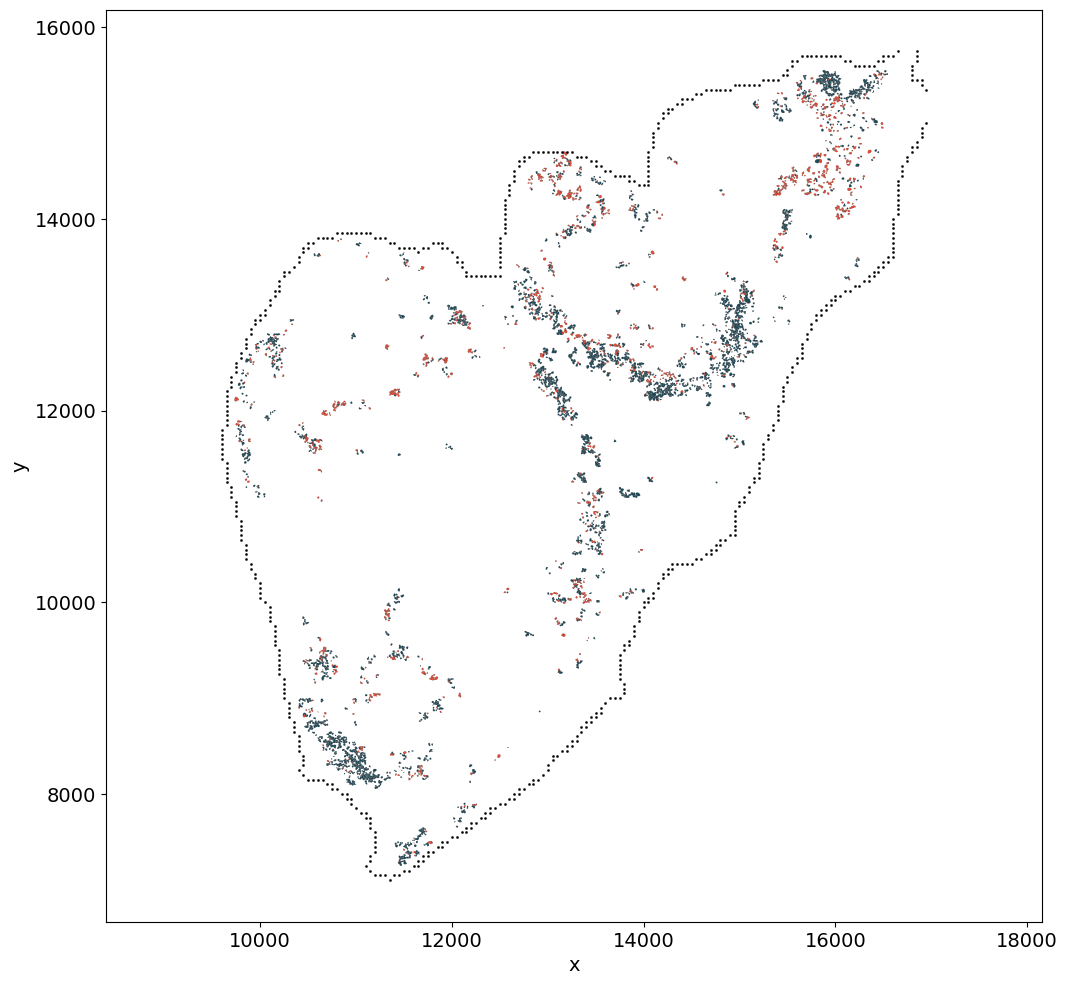

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from scipy.interpolate import splprep, splev
import seaborn as sns

GM_COLOR = '#E64B35'   # 亮红
GA_COLOR = '#204B5A'   # 深蓝
BG_COLOR = 'white'     # 画布底色
TXT_COLOR = 'black'    # 文字颜色（与背景反色）

fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)

# -------------------------------------------------
# 3. 绘制散点
# -------------------------------------------------
#ax.scatter(data_GA['x'], data_GA['y'],color=GA_COLOR, s=0.05, marker='s', rasterized=True)
#ax.scatter(data_GM['x'], data_GM['y'],color=GM_COLOR, s=0.05, marker='s', rasterized=True)

# -------------------------------------------------
# 4. 平滑边界并生成 Path 补丁
# -------------------------------------------------
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

patches = []
for cell_boundary in filtered_cell_borders_list:
    if len(cell_boundary) < 3:
        continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes = [Path.LINETO] * len(smooth)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor = 'black',
                             facecolor=GM_COLOR,
                             lw = 0.1,
                             antialiased=True))

for cell_boundary in filtered_cell_borders_list1:
    if len(cell_boundary) < 3:
        continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes = [Path.LINETO] * len(smooth)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor = 'black',
                             facecolor=GA_COLOR,
                             lw = 0.1,
                             antialiased=True))

ax.add_collection(PatchCollection(patches, match_original=True))

# -------------------------------------------------
# 5. 绘制组织轮廓（可选）
# -------------------------------------------------
sns.scatterplot(data=tissue_outline, x='x', y='y',
                color='black', s=3, edgecolor=None, ax=ax)

# -------------------------------------------------
# 6. 图例、坐标轴、保存
# -------------------------------------------------
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='GM',
           markerfacecolor=GM_COLOR, markersize=8, lw=0),
    Line2D([0], [0], marker='s', color='w', label='GA',
           markerfacecolor=GA_COLOR, markersize=8, lw=0)
]
'''
legend = ax.legend(handles=legend_elements,
                   loc='upper right',
                   frameon=True,
                   framealpha=0.9,
                   facecolor=BG_COLOR,
                   edgecolor=TXT_COLOR,
                   fontsize=8,
                   title_fontsize=10)
plt.setp(legend.get_texts(), color=TXT_COLOR)

ax.set_xlabel("X Coordinate", color=TXT_COLOR)
ax.set_ylabel("Y Coordinate", color=TXT_COLOR)
ax.tick_params(axis='both', colors=TXT_COLOR)
ax.grid(False)
# 获取当前坐标轴的数据范围
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 计算中心点和最大跨度
x_center = (xlim[0] + xlim[1]) / 2
y_center = (ylim[0] + ylim[1]) / 2
max_range = max(xlim[1] - xlim[0], ylim[1] - ylim[0])

# 设置正方形范围
ax.set_xlim(x_center - max_range / 2, x_center + max_range / 2)
ax.set_ylim(y_center - max_range / 2, y_center + max_range / 2)
# -------------------------------------------------
# 7. 保存
# -------------------------------------------------
'''
plt.grid(False)
plt.axis('equal')
plt.savefig('fig5e1_zoomin.png',
            dpi=2500,               # 2500 太大，600 已足够
            bbox_inches='tight',
            facecolor=BG_COLOR,
            edgecolor='none')
plt.show()

# Sup 9B

In [20]:
import pandas as pd

# 初始化一个空的 DataFrame，用于存储结果
result_df = pd.DataFrame(columns=['TLS-GA', 'PCA-GA'], index=batch_categories)

# 遍历每个批次
for i in range(0, 11):  # 注意索引范围是 0 到 10，因为 batch_categories 有 11 个元素
    data = adata_list[i]
    batch = batch_categories[i]
    
    # 提取 TLS 和 PCA 数据
    TLS = data.obs[data.obs['bin50 structural annotation'] == 'LA-TLS']
    PCA = data.obs[data.obs['bin50 structural annotation'] == 'LA-PCA']
    
    # 筛选出 TLS 和 PCA 中属于 IGHG, IGHA 的数据
    TLS_GA = TLS[TLS['class'].isin(['IGHG, IGHA'])]
    TLS_GA_num = TLS_GA.shape[0]  # 计算 TLS-GA 的数量
    
    PCA_GA = PCA[PCA['class'].isin(['IGHG, IGHA'])]
    PCA_GA_num = PCA_GA.shape[0]  # 计算 PCA-GA 的数量
    
    # 将结果存储到 DataFrame 中
    result_df.loc[batch, 'TLS-GA'] = TLS_GA_num
    result_df.loc[batch, 'PCA-GA'] = PCA_GA_num

# 将结果保存到 CSV 文件
result_df.to_csv('Figure5F_left_TLS_GA_PCA_GA_counts.csv')

print("CSV 文件已生成，文件名为：batch_TLS_GA_PCA_GA_counts.csv")

CSV 文件已生成，文件名为：batch_TLS_GA_PCA_GA_counts.csv


In [21]:
import pandas as pd

# 初始化一个空的 DataFrame，用于存储结果
result_df = pd.DataFrame(columns=['TLS-GM', 'PCA-GM'], index=batch_categories)

# 遍历每个批次
for i in range(0, 11):  # 注意索引范围是 0 到 10，因为 batch_categories 有 11 个元素
    data = adata_list[i]
    batch = batch_categories[i]
    
    # 提取 TLS 和 PCA 数据
    TLS = data.obs[data.obs['bin50 structural annotation'] == 'LA-TLS']
    PCA = data.obs[data.obs['bin50 structural annotation'] == 'LA-PCA']
    
    # 筛选出 TLS 和 PCA 中属于 IGHG, IGHA 的数据
    TLS_GM = TLS[TLS['class'].isin(['IGHG, IGHM'])]
    TLS_GM_num = TLS_GM.shape[0]  # 计算 TLS-GA 的数量
    
    PCA_GM = PCA[PCA['class'].isin(['IGHG, IGHM'])]
    PCA_GM_num = PCA_GM.shape[0]  # 计算 PCA-GA 的数量
    
    # 将结果存储到 DataFrame 中
    result_df.loc[batch, 'TLS-GM'] = TLS_GM_num
    result_df.loc[batch, 'PCA-GM'] = PCA_GM_num

# 将结果保存到 CSV 文件
result_df.to_csv('Figure5F_left_TLS_GM_PCA_GM_counts.csv')

print("CSV 文件已生成，文件名为：batch_TLS_GM_PCA_GM_counts.csv")

CSV 文件已生成，文件名为：batch_TLS_GM_PCA_GM_counts.csv


# Sup 9C

In [22]:
adata1

AnnData object with n_obs × n_vars = 130469 × 33160
    obs: 'dnbCount', 'area', 'orig.ident', 'x', 'y', 'cellID', 'bin50_x', 'bin50_y', 'TRAcdr3aa', 'TRBcdr3aa', 'IGK/Lcdr3aa', 'IGKorIGL', 'bin50_location_id', 'anno', 'anno2', 'bin50 structural annotation', 'loc', 'PCAcluster', 'TLScluster', 'CSR', 'class', 'TRDcdr3aa', 'TRGcdr3aa', 'IGHcdr3aa', 'mutation_percent', 'clone_family_id', 'shm', 'depth', 'label'
    var: 'real_gene_name'
    uns: 'PCAcluster_colors', 'TLScluster_colors', 'anno2_colors', 'bin50 structural annotation_colors', 'bin_size', 'bin_type', 'key_record', 'merged', 'resolution', 'sn', 'tissue_outline'
    obsm: 'X_umap', 'cell_border', 'spatial'

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


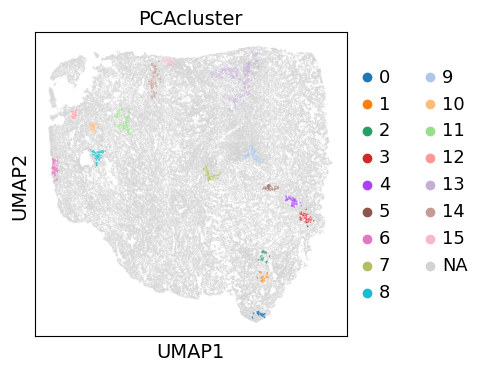

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


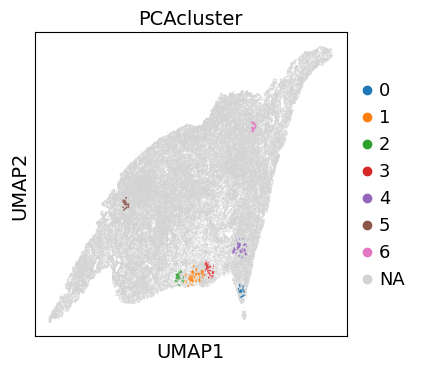

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


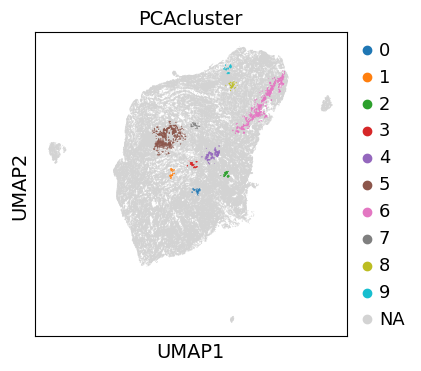

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


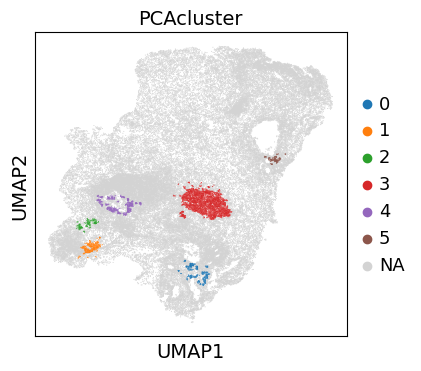

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


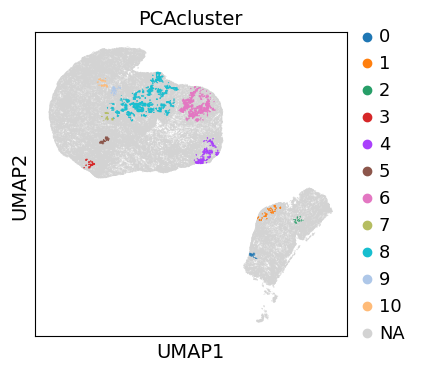

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


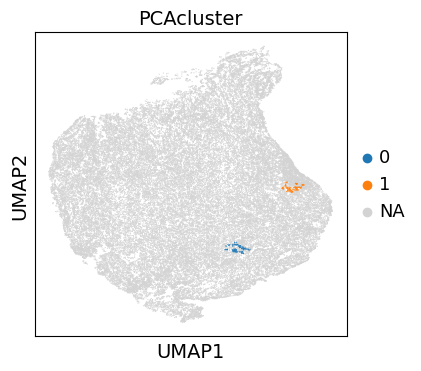

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


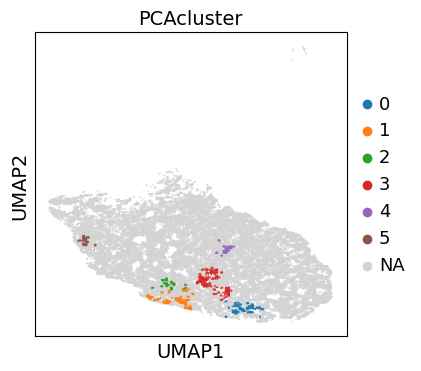

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


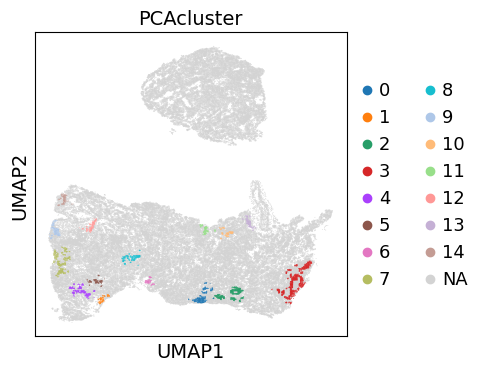

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


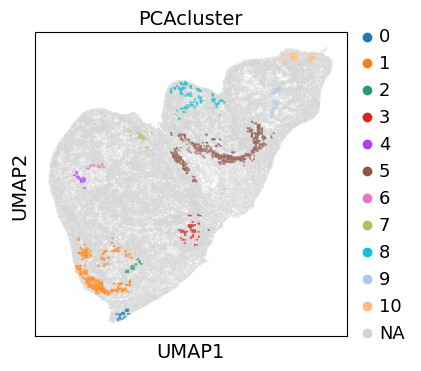

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


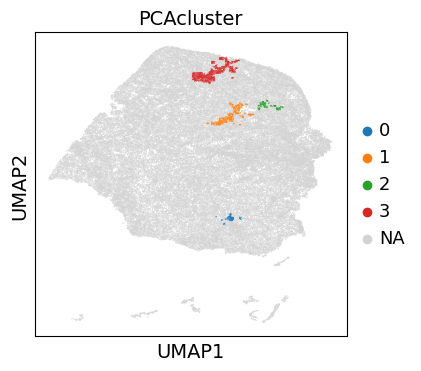

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


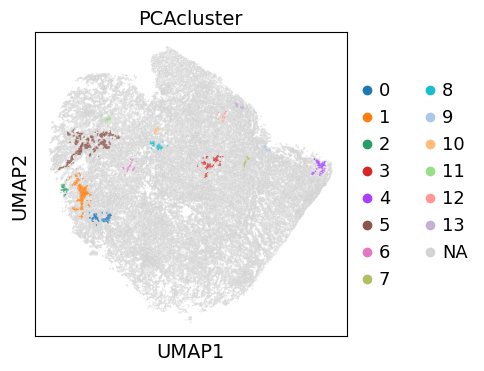

In [23]:
for i in range(11):
    data = adata_list[i]
    sc.pl.umap(data ,color = 'PCAcluster')

# Sup9 D

In [25]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


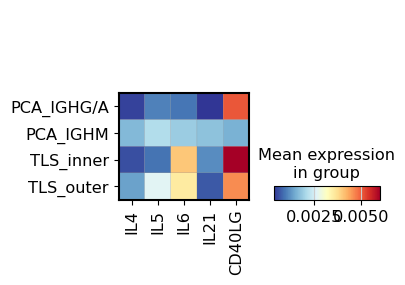

In [26]:
adata.obs_names=adata.obs_names.astype(str)
tmp=adata[adata.obs['bin50 structural annotation'].isin(['LA-TLS','LA-PCA'])]
sc.pl.matrixplot(tmp,
              ['IL4','IL5','IL6','IL21','CD40LG'],groupby='LA_anno'
                 ,cmap='RdYlBu_r',vmax=0.006,save='supfig9D.pdf')

# Sup9E

In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/fengyu/miniconda3/envs/squidpy/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
import scanpy as sc
print(sc.__version__)

1.10.3


In [3]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/squidpy/lib/python3.9/site-packages/anndata/_core/annda

In [4]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
meta['loc'] = meta['loc'].astype(str)
original_index = adata.obs.index
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')
adata.obs.merge(meta[['loc', 'LA_anno']], on='loc', how='left')
adata.obs.index = original_index

In [5]:
for m,i in zip([adata1,adata2, adata3,adata4,adata5,adata6,adata7,adata8,adata9,adata10,adata11],
               ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]):
    print(i)
    df=adata[adata.obs['batch']==i].obs
    ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()
    m.obs['PCA_TRBcdr3aa_counts']=0
    m.obs.loc[m.obs['TRBcdr3aa'].isin(ls),'PCA_TRBcdr3aa_counts']=1
    sq.gr.spatial_neighbors(m, coord_type='grid')  
    sq.gr.spatial_autocorr(m, n_jobs=1, mode='moran',attr='obs', use_raw=False, genes='PCA_TRBcdr3aa_counts')
    print(m.uns['moranI']['I'])
    m.obs['not_PCA_TRBcdr3aa_counts']=0
    m.obs.loc[(m.obs['TRBcdr3aa'].notna())&(~m.obs['TRBcdr3aa'].isin(ls)),'not_PCA_TRBcdr3aa_counts']=1
    sq.gr.spatial_neighbors(m, coord_type='grid')  
    sq.gr.spatial_autocorr(m, n_jobs=1, mode='moran',attr='obs', use_raw=False, genes='not_PCA_TRBcdr3aa_counts')
    print(m.uns['moranI']['I'])

D06047A2


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.128275
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts   -0.000228
Name: I, dtype: float64
D06047C3


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.009561
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.003108
Name: I, dtype: float64
D06047D4


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.014965
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts   -0.001319
Name: I, dtype: float64
D06047E1


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.076348
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.004258
Name: I, dtype: float64
D06047E2


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.014323
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.00185
Name: I, dtype: float64
D06047F6


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.034382
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.005684
Name: I, dtype: float64
D06050A2


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.000455
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.061416
Name: I, dtype: float64
D06050C2


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.011055
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts   -0.001604
Name: I, dtype: float64
D06050D4


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.056581
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.005291
Name: I, dtype: float64
D06050E4


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.114102
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.004002
Name: I, dtype: float64
D06053D2


/tmp/ipykernel_3132255/3041389114.py:5: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()


PCA_TRBcdr3aa_counts    0.124033
Name: I, dtype: float64
not_PCA_TRBcdr3aa_counts    0.002162
Name: I, dtype: float64
